# Fifa 19
Dataset used: [Fifa 19 dataset](https://www.kaggle.com/karangadiya/fifa19)

Target Variable:
- Wage: integer, in thousand €, not null



In [1]:
# All imports needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OrdinalEncoder
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor

import datetime

In [2]:
# Read data from file
df = pd.read_csv("../data/fifa/fifa19.csv")
pd.set_option('display.max_columns', 500)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
# show attributes, types and number of entries
df.info()
# df.columns()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [4]:
# missing values
# all rows with nan values, 18207 in total
# null_fifa = df[df.isnull().values.any(axis=1)]
# 
# how many values missing per column, only if > 0
values_missing = df.isna().sum()
values_missing[values_missing > 0]

# percentage for each column
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing[percent_missing > 0]

# how many values missing in total, 76984 in total
pd.set_option('display.max_rows', 500)

df.isnull().sum().sum()
print(df.isnull().sum())

# visualize as heatmap, missing values are white
# fig, ax = plt.subplots(figsize=(20,20)) 
# cmap = sns.cm.rocket_r
# sns.heatmap(df.isnull(), cbar=False, ax=ax, cmap=cmap)
# plt.savefig('heatmap_missing_values.png')

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [5]:
# heatmap visualises the correlation of each pair of values
# sns.heatmap(df.corr())

# plt.figure(figsize=(6,30))
# sns.countplot(y=df.Club)
# plt.show()




In [6]:
# drop unnecessary columns
df = df.drop(columns=["Unnamed: 0", "ID", "Photo", "Flag", "Club Logo", "Real Face"])
# drop other columns
df = df.drop(columns=["Name"])
df = df.drop(columns=["Release Clause"])
df = df.drop('Club', 1)

In [7]:
# drop goalkeepers because they have missing values for position stats
# and also rows with missing value for Position for same reason 

df = df[df["Position"] != "GK"]
df = df[~df["Position"].isnull()]

df = df[~df["Joined"].isnull()]

df = df[~df["Contract Valid Until"].isnull()]

In [8]:
df.head()

,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
4,27,Belgium,91,92,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
5,27,Belgium,91,91,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0


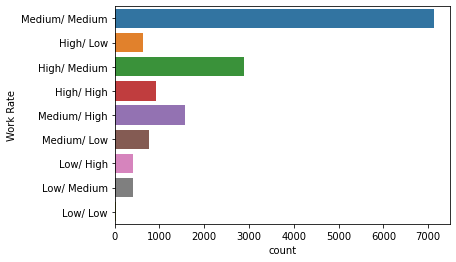

In [9]:
sns.countplot(y=df['Work Rate'])

In [10]:
x = df['Work Rate'].str.split('/', n = 1, expand = True)
df['work_rate_1'] = x[0]
df['work_rate_2'] = x[1]
df = df.drop('Work Rate',1)

asdf = {
    "work_rate_1": {"Low": 1, "Medium": 2, "High": 3},
    "work_rate_2": {" Low": 1, " Medium": 2, " High": 3}
}

df.replace(asdf, inplace=True)

In [11]:
df.head()

,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,work_rate_1,work_rate_2
0,31,Argentina,94,94,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2,2
1,33,Portugal,94,94,€77M,€405K,2228,Right,5.0,4.0,5.0,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,3,1
2,26,Brazil,92,93,€118.5M,€290K,2143,Right,5.0,5.0,5.0,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,3,2
4,27,Belgium,91,92,€102M,€355K,2281,Right,4.0,5.0,4.0,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,3,3
5,27,Belgium,91,91,€93M,€340K,2142,Right,4.0,4.0,4.0,Normal,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,3,2


# Clean-up Columns

In [12]:
# Todos
# Release Clause: cant format due to NaN values
# stats zB LS
# Goalkeepers have NaN at position stats

# work rate -> attack/defence (High, Medium, Low)
# Jersey Number NaN?



# df["Body Type"].unique()
# df.loc[df['Body Type'] == 'Lean']

In [13]:
# clean Value column
df['Value'] = df['Value'].str.replace('€','')
bool_arr_M = df['Value'].str.endswith('M')
bool_arr_K = df['Value'].str.endswith('K')
df['Value'][bool_arr_M] = df['Value'][bool_arr_M].str.replace('M', '')
df['Value'][bool_arr_K] = df['Value'][bool_arr_K].str.replace('K', '')
df['Value'][bool_arr_M] = df['Value'][bool_arr_M].astype('float') * 1000
df['Value'][bool_arr_K] = df['Value'][bool_arr_K].astype('float') * 1
df["Value"] = df["Value"].astype(int)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

In [14]:
# # clean Release Clause column
# df['Release Clause'] = df['Release Clause'].str.replace('€','')
# bool_arr_M = df['Release Clause'].str.endswith('M')
# bool_arr_K = df['Release Clause'].str.endswith('K')
# # df['Release Clause'][bool_arr_M] = df['Release Clause'][bool_arr_M].str.replace('M', '')
# # df['Release Clause'][bool_arr_K] = df['Release Clause'][bool_arr_K].str.replace('K', '')
# # df['Release Clause'][bool_arr_M] = df['Release Clause'][bool_arr_M].astype('float') * 1000000
# # df['Release Clause'][bool_arr_K] = df['Release Clause'][bool_arr_K].astype('float') * 1000
# df["Release Clause"]

In [15]:
df.head()

,Age,Nationality,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,work_rate_1,work_rate_2
0,31,Argentina,94,94,110500,€565K,2202,Left,5.0,4.0,4.0,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2,2
1,33,Portugal,94,94,77000,€405K,2228,Right,5.0,4.0,5.0,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,3,1
2,26,Brazil,92,93,118500,€290K,2143,Right,5.0,5.0,5.0,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,3,2
4,27,Belgium,91,92,102000,€355K,2281,Right,4.0,5.0,4.0,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,3,3
5,27,Belgium,91,91,93000,€340K,2142,Right,4.0,4.0,4.0,Normal,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,3,2


In [16]:
# clean Wage column
df['Wage'] = df['Wage'].str.replace('€','')
bool_arr_K = df['Wage'].str.endswith('K')
df['Wage'][bool_arr_K] = df['Wage'][bool_arr_K].str.replace('K', '')
df['Wage'][bool_arr_K] = df['Wage'][bool_arr_K].astype('float') * 1
df["Wage"] = df["Wage"].astype(int)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
# Dummy Preferred Foot
df['Preferred Foot'] = df['Preferred Foot'].str.lower()
dummies = pd.get_dummies(df['Preferred Foot'], prefix='foot')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Preferred Foot',1)

# for x in df["Preferred Foot"]:
#     x_str = str(x)
#     if x_str=="Left":
#         value=0
#     else:
#         value=1
#     print(value)

In [18]:
df.head()

,Age,Nationality,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,work_rate_1,work_rate_2,foot_left,foot_right
0,31,Argentina,94,94,110500,565,2202,5.0,4.0,4.0,Messi,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2,2,1,0
1,33,Portugal,94,94,77000,405,2228,5.0,4.0,5.0,C. Ronaldo,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,3,1,0,1
2,26,Brazil,92,93,118500,290,2143,5.0,5.0,5.0,Neymar,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,3,2,0,1
4,27,Belgium,91,92,102000,355,2281,4.0,5.0,4.0,Normal,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,3,3,0,1
5,27,Belgium,91,91,93000,340,2142,4.0,4.0,4.0,Normal,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,3,2,0,1


In [19]:
print(df['Body Type'].value_counts())
    
asdf = {"body_type":
 {"Lean": 1, "Normal": 2, "Stocky": 3, 
  "C. Ronaldo": 2, 
  "PLAYER_BODY_TYPE_25": 2, 
  "Messi": 2, 
  "Neymar": 2, 
  "Akinfenwa": 2, 
  "Shaqiri": 2}
}


df['body_type'] = df['Body Type'].copy()

df.replace(asdf, inplace=True)
df = df.drop('Body Type',1)

print(df['body_type'].value_counts())

Normal                 8379
Lean                   5442
Stocky                  924
Akinfenwa                 1
PLAYER_BODY_TYPE_25       1
C. Ronaldo                1
Shaqiri                   1
Neymar                    1
Messi                     1
Name: Body Type, dtype: int64
2    8385
1    5442
3     924
Name: body_type, dtype: int64


In [20]:
df.head()

,Age,Nationality,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,work_rate_1,work_rate_2,foot_left,foot_right,body_type
0,31,Argentina,94,94,110500,565,2202,5.0,4.0,4.0,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2,2,1,0,2
1,33,Portugal,94,94,77000,405,2228,5.0,4.0,5.0,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,3,1,0,1,2
2,26,Brazil,92,93,118500,290,2143,5.0,5.0,5.0,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,3,2,0,1,2
4,27,Belgium,91,92,102000,355,2281,4.0,5.0,4.0,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,3,3,0,1,2
5,27,Belgium,91,91,93000,340,2142,4.0,4.0,4.0,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,3,2,0,1,2


In [21]:
# Dummy Club
# df['Club'] = df['Club'].str.lower()
# dummies = pd.get_dummies(df['Club'], prefix='club')
# df = pd.concat([df, dummies], axis=1)
# df = df.drop('Club',1)

In [22]:
# Split Work Rate + Dummy
# split = df['Work Rate'].str.split("/ ")
# attack = split.apply(lambda x:x[0])
# defense = split.apply(lambda x:x[1])
# df = df.drop('Work Rate',1)
# 
# df["workrate_attack"] = attack
# df["workrate_defense"] = defense
# 
# df['workrate_attack'] = df['workrate_attack'].str.lower()
# dummies = pd.get_dummies(df['workrate_attack'], prefix='workrate_attack')
# df = pd.concat([df, dummies], axis=1)
# df = df.drop('workrate_attack',1)
# 
# df['workrate_defense'] = df['workrate_defense'].str.lower()
# dummies = pd.get_dummies(df['workrate_defense'], prefix='workrate_defense')
# df = pd.concat([df, dummies], axis=1)
# df = df.drop('workrate_defense',1)

In [23]:
# Body Type Dummy
# df['Body Type'].value_counts()
# df['Body Type'] = df['Body Type'].str.lower()
# values = ["normal", "lean", "stocky"]
# 
# bool_arr_other = ~df['Body Type'].isin(values)
# 
# df['Body Type'][bool_arr_other] = "other"
# df['Body Type']
# 
# 
# df['Body Type'] = df['Body Type'].str.lower()
# dummies = pd.get_dummies(df['Body Type'], prefix='bodytype')
# df = pd.concat([df, dummies], axis=1)
# df = df.drop('Body Type',1)

In [24]:
df.head()

,Age,Nationality,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,work_rate_1,work_rate_2,foot_left,foot_right,body_type
0,31,Argentina,94,94,110500,565,2202,5.0,4.0,4.0,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2,2,1,0,2
1,33,Portugal,94,94,77000,405,2228,5.0,4.0,5.0,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,3,1,0,1,2
2,26,Brazil,92,93,118500,290,2143,5.0,5.0,5.0,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,3,2,0,1,2
4,27,Belgium,91,92,102000,355,2281,4.0,5.0,4.0,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,3,3,0,1,2
5,27,Belgium,91,91,93000,340,2142,4.0,4.0,4.0,LF,10.0,"Jul 1, 2012",NaN,2020,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,3,2,0,1,2


In [25]:
# Joined + Contract Valid Until Datetime TODO
df['Joined'] = pd.to_datetime(df['Joined']).dt.year

df['valid_until'] = pd.to_datetime(df['Contract Valid Until']).dt.year
df = df.drop('Contract Valid Until',1)

In [26]:
df["Joined"]

0        2004
1        2018
2        2017
4        2015
5        2012
         ... 
18202    2017
18203    2018
18204    2017
18205    2018
18206    2018
Name: Joined, Length: 14751, dtype: int64

In [27]:
#sns.distplot(df['Loaned From'])
df['Loaned From'].value_counts()

Series([], Name: Loaned From, dtype: int64)

In [28]:
# transform Loaned From -> yes/no 
# print(df['Loaned From'].isnull().sum())
# print(df['Loaned From'].value_counts())
df['Loaned From'] = df['Loaned From'].fillna('None')
df['Loaned From'] = [0 if x == 'None' else 1 for x in df['Loaned From']]
df.head()

,Age,Nationality,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,work_rate_1,work_rate_2,foot_left,foot_right,body_type,valid_until
0,31,Argentina,94,94,110500,565,2202,5.0,4.0,4.0,RF,10.0,2004,0,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2,2,1,0,2,2021
1,33,Portugal,94,94,77000,405,2228,5.0,4.0,5.0,ST,7.0,2018,0,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,3,1,0,1,2,2022
2,26,Brazil,92,93,118500,290,2143,5.0,5.0,5.0,LW,10.0,2017,0,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,3,2,0,1,2,2022
4,27,Belgium,91,92,102000,355,2281,4.0,5.0,4.0,RCM,7.0,2015,0,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,3,3,0,1,2,2023
5,27,Belgium,91,91,93000,340,2142,4.0,4.0,4.0,LF,10.0,2012,0,5'8,163lbs,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,3,2,0,1,2,2020


In [29]:
#sns.countplot(df['Loaned From'])

In [30]:
# Height
def get_inches(height):
    # format: 5'7"    
    ht = height.split("'")
    ft = float(ht[0])
    inch = float(ht[1])
    return (12*ft) + inch

df["Height"][~df["Height"].isnull()] = df["Height"][~df["Height"].isnull()].apply(lambda x:get_inches(str(x)))

heights = df["Height"][~df["Height"].isnull()].astype(int)
median = np.median(heights)
df["Height"][df["Height"].isnull()] = median

df['Height'] = df['Height'].astype(int)

# plt.hist(df["Height"])
# plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [31]:
# Weight
df['Weight'] = df['Weight'].str.replace('lbs','')

weights = df["Weight"][~df["Weight"].isnull()].astype(int)
median = np.median(weights)
df["Weight"][df["Weight"].isnull()] = median

df['Weight'] = df['Weight'].astype(int)

# plt.hist(df["Weight"][~df["Weight"].isnull()].astype(int))
# plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
df.head()

,Age,Nationality,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,work_rate_1,work_rate_2,foot_left,foot_right,body_type,valid_until
0,31,Argentina,94,94,110500,565,2202,5.0,4.0,4.0,RF,10.0,2004,0,67,159,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2,2,1,0,2,2021
1,33,Portugal,94,94,77000,405,2228,5.0,4.0,5.0,ST,7.0,2018,0,74,183,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,3,1,0,1,2,2022
2,26,Brazil,92,93,118500,290,2143,5.0,5.0,5.0,LW,10.0,2017,0,69,150,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,3,2,0,1,2,2022
4,27,Belgium,91,92,102000,355,2281,4.0,5.0,4.0,RCM,7.0,2015,0,71,154,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,3,3,0,1,2,2023
5,27,Belgium,91,91,93000,340,2142,4.0,4.0,4.0,LF,10.0,2012,0,68,163,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,82+3,82+3,82+3,89+3,66+3,63+3,63+3,63+3,66+3,60+3,49+3,49+3,49+3,60+3,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,3,2,0,1,2,2020


In [33]:
# calculate statistics


df["LS"] = df["LS"].apply(lambda x:eval(x))
df["ST"] = df["ST"].apply(lambda x:eval(x))
df["RS"] = df["RS"].apply(lambda x:eval(x))
df["LW"] = df["LW"].apply(lambda x:eval(x))
df["LF"] = df["LF"].apply(lambda x:eval(x))
df["CF"] = df["CF"].apply(lambda x:eval(x))
df["RF"] = df["RF"].apply(lambda x:eval(x))
df["RW"] = df["RW"].apply(lambda x:eval(x))
df["LAM"] = df["LAM"].apply(lambda x:eval(x))
df["CAM"] = df["CAM"].apply(lambda x:eval(x))
df["RAM"] = df["RAM"].apply(lambda x:eval(x))
df["LM"] = df["LM"].apply(lambda x:eval(x))
df["LCM"] = df["LCM"].apply(lambda x:eval(x))
df["CM"] = df["CM"].apply(lambda x:eval(x))
df["RCM"] = df["RCM"].apply(lambda x:eval(x))
df["RM"] = df["RM"].apply(lambda x:eval(x))
df["LWB"] = df["LWB"].apply(lambda x:eval(x))
df["LDM"] = df["LDM"].apply(lambda x:eval(x))
df["CDM"] = df["CDM"].apply(lambda x:eval(x))
df["RDM"] = df["RDM"].apply(lambda x:eval(x))
df["RWB"] = df["RWB"].apply(lambda x:eval(x))
df["LB"] = df["LB"].apply(lambda x:eval(x))
df["LCB"] = df["LCB"].apply(lambda x:eval(x))
df["CB"] = df["CB"].apply(lambda x:eval(x))
df["RCB"] = df["RCB"].apply(lambda x:eval(x))
df["RB"] = df["RB"].apply(lambda x:eval(x))

In [34]:
df.head()

,Age,Nationality,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Position,Jersey Number,Joined,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,work_rate_1,work_rate_2,foot_left,foot_right,body_type,valid_until
0,31,Argentina,94,94,110500,565,2202,5.0,4.0,4.0,RF,10.0,2004,0,67,159,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2,2,1,0,2,2021
1,33,Portugal,94,94,77000,405,2228,5.0,4.0,5.0,ST,7.0,2018,0,74,183,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,3,1,0,1,2,2022
2,26,Brazil,92,93,118500,290,2143,5.0,5.0,5.0,LW,10.0,2017,0,69,150,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,3,2,0,1,2,2022
4,27,Belgium,91,92,102000,355,2281,4.0,5.0,4.0,RCM,7.0,2015,0,71,154,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,3,3,0,1,2,2023
5,27,Belgium,91,91,93000,340,2142,4.0,4.0,4.0,LF,10.0,2012,0,68,163,86,86,86,92,91,91,91,92,92,92,92,92,85,85,85,92,69,66,66,66,69,63,52,52,52,63,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,3,2,0,1,2,2020


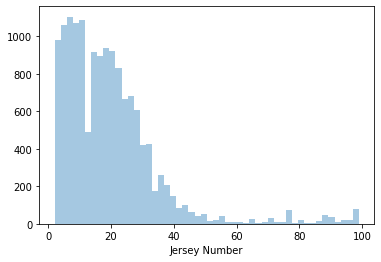

In [35]:
sns.distplot(df['Jersey Number'], kde=False)

In [49]:
df['Jersey Number'] = df['Jersey Number'].astype('int')
df['jersey_number'] = ['other' if x > 30 else x for x in df['Jersey Number']]
df = df.drop('Jersey Number',1)

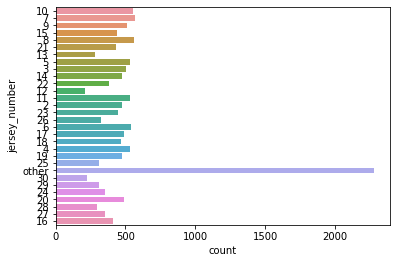

In [50]:
#df.head()
sns.countplot(y=df['jersey_number'])

In [21]:
# Jersey Number Dummy
#df["Jersey Number"] = df["Jersey Number"].astype('Int64')
#
#dummies = pd.get_dummies(df['Jersey Number'], prefix='jersey')
#df = pd.concat([df, dummies], axis=1)
#df = df.drop('Jersey Number',1)
#
## what about NaN values?

In [52]:
df.head()

,Age,Nationality,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Position,Joined,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,work_rate_1,work_rate_2,foot_left,foot_right,body_type,valid_until,jersey_number
0,31,Argentina,94,94,110500,565,2202,5.0,4.0,4.0,RF,2004,0,67,159,90,90,90,94,95,95,95,94,95,95,95,93,86,86,86,93,66,63,63,63,66,61,49,49,49,61,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,2,2,1,0,2,2021,10
1,33,Portugal,94,94,77000,405,2228,5.0,4.0,5.0,ST,2018,0,74,183,94,94,94,92,93,93,93,92,91,91,91,91,84,84,84,91,68,64,64,64,68,64,56,56,56,64,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,3,1,0,1,2,2022,7
2,26,Brazil,92,93,118500,290,2143,5.0,5.0,5.0,LW,2017,0,69,150,87,87,87,92,92,92,92,92,92,92,92,91,84,84,84,91,68,63,63,63,68,63,50,50,50,63,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,3,2,0,1,2,2022,10
4,27,Belgium,91,92,102000,355,2281,4.0,5.0,4.0,RCM,2015,0,71,154,85,85,85,90,90,90,90,90,91,91,91,91,90,90,90,91,80,80,80,80,80,76,69,69,69,76,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,3,3,0,1,2,2023,7
5,27,Belgium,91,91,93000,340,2142,4.0,4.0,4.0,LF,2012,0,68,163,86,86,86,92,91,91,91,92,92,92,92,92,85,85,85,92,69,66,66,66,69,63,52,52,52,63,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,3,2,0,1,2,2020,10


In [53]:
# Position Dummy
df['Position'] = df['Position'].str.lower()
dummies = pd.get_dummies(df['Position'], prefix='position')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Position',1)

In [54]:
# Dummy Nationality
df['Nationality'] = df['Nationality'].str.lower()
dummies = pd.get_dummies(df['Nationality'], prefix='nationality')
df = pd.concat([df, dummies], axis=1)
df = df.drop('Nationality',1)

In [55]:
df.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Joined,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,work_rate_1,work_rate_2,foot_left,foot_right,body_type,valid_until,jersey_number,position_cam,position_cb,position_cdm,position_cf,position_cm,position_lam,position_lb,position_lcb,position_lcm,position_ldm,position_lf,position_lm,position_ls,position_lw,position_lwb,position_ram,position_rb,position_rcb,position_rcm,position_rdm,position_rf,position_rm,position_rs,position_rw,position_rwb,position_st,nationality_afghanistan,nationality_albania,nationality_algeria,nationality_andorra,nationality_angola,nationality_antigua & barbuda,nationality_argentina,nationality_armenia,nationality_australia,nationality_austria,nationality_azerbaijan,nationality_barbados,nationality_belarus,nationality_belgium,nationality_belize,nationality_benin,nationality_bermuda,nationality_bolivia,nationality_bosnia herzegovina,nationality_botswana,nationality_brazil,nationality_bulgaria,nationality_burkina faso,nationality_burundi,nationality_cameroon,nationality_canada,nationality_cape verde,nationality_central african rep.,nationality_chad,nationality_chile,nationality_china pr,nationality_colombia,nationality_comoros,nationality_congo,nationality_costa rica,nationality_croatia,nationality_cuba,nationality_curacao,nationality_cyprus,nationality_czech republic,nationality_denmark,nationality_dominican republic,nationality_dr congo,nationality_ecuador,nationality_egypt,nationality_el salvador,nationality_england,nationality_equatorial guinea,nationality_eritrea,nationality_estonia,nationality_ethiopia,nationality_faroe islands,nationality_fiji,nationality_finland,nationality_france,nationality_fyr macedonia,nationality_gabon,nationality_gambia,nationality_georgia,nationality_germany,nationality_ghana,nationality_greece,nationality_grenada,nationality_guam,nationality_guatemala,nationality_guinea,nationality_guinea bissau,nationality_guyana,nationality_haiti,nationality_honduras,nationality_hong kong,nationality_hungary,nationality_iceland,nationality_indonesia,nationality_iran,nationality_iraq,nationality_israel,nationality_italy,nationality_ivory coast,nationality_jamaica,nationality_japan,nationality_jordan,nationality_kazakhstan,nationality_kenya,nationality_korea dpr,nationality_korea republic,nationality_kosovo,nationality_kuwait,nationality_latvia,nationality_lebanon,nationality_liberia,nationality_libya,nationality_liechtenstein,nationality_lithuania,nationality_luxembourg,nationality_madagascar,nationality_mali,nationality_mauritania,nationality_mauritius,nationality_mexico,nationality_moldova,nationality_montenegro,nationality_montserrat,nationality_morocco,nationality_mozambique,nationality_namibia,nationality_netherlands,nationality_new caledonia,nationality_new zealand,nationality_nicaragua,nationality_niger,nationality_nigeria,nationality_northern ireland,nationality_norway,nationality_palestine,nationality_panama,nationality_paraguay,nationality_peru,nationality_philippines,nationality_poland,nationality_portugal,nationality_puerto rico,nationality_qatar,nationality_republic of ireland,nationality_romania,nationality_russia,nationality_rwanda,nationality_saudi arabia,nationality_scotland,nationality_senegal,nationality_serbia,nationality_sierra leone,nationality_slovakia,nationality_slovenia,nationality_south africa,nationality_south sudan,nationality_spain,nationality_st kitts nevis,nationality_sudan,nationality_suriname,nationality_sweden,nationality_switzerland,nationality_s

In [56]:
# missing values
ls = df.isnull().sum()
ls[ls!=0]

Series([], dtype: int64)

In [57]:
# all int/float values - and 1 datetime
types = df.dtypes
types = types[~types.astype("str").str.contains("int")]
types = types[~types.astype("str").str.contains("float")]
types

jersey_number    object
dtype: object

In [58]:
# TODO 
# types -> Joined Datetime, Jersey missing values

In [59]:
df.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Joined,Loaned From,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,work_rate_1,work_rate_2,foot_left,foot_right,body_type,valid_until,jersey_number,position_cam,position_cb,position_cdm,position_cf,position_cm,position_lam,position_lb,position_lcb,position_lcm,position_ldm,position_lf,position_lm,position_ls,position_lw,position_lwb,position_ram,position_rb,position_rcb,position_rcm,position_rdm,position_rf,position_rm,position_rs,position_rw,position_rwb,position_st,nationality_afghanistan,nationality_albania,nationality_algeria,nationality_andorra,nationality_angola,nationality_antigua & barbuda,nationality_argentina,nationality_armenia,nationality_australia,nationality_austria,nationality_azerbaijan,nationality_barbados,nationality_belarus,nationality_belgium,nationality_belize,nationality_benin,nationality_bermuda,nationality_bolivia,nationality_bosnia herzegovina,nationality_botswana,nationality_brazil,nationality_bulgaria,nationality_burkina faso,nationality_burundi,nationality_cameroon,nationality_canada,nationality_cape verde,nationality_central african rep.,nationality_chad,nationality_chile,nationality_china pr,nationality_colombia,nationality_comoros,nationality_congo,nationality_costa rica,nationality_croatia,nationality_cuba,nationality_curacao,nationality_cyprus,nationality_czech republic,nationality_denmark,nationality_dominican republic,nationality_dr congo,nationality_ecuador,nationality_egypt,nationality_el salvador,nationality_england,nationality_equatorial guinea,nationality_eritrea,nationality_estonia,nationality_ethiopia,nationality_faroe islands,nationality_fiji,nationality_finland,nationality_france,nationality_fyr macedonia,nationality_gabon,nationality_gambia,nationality_georgia,nationality_germany,nationality_ghana,nationality_greece,nationality_grenada,nationality_guam,nationality_guatemala,nationality_guinea,nationality_guinea bissau,nationality_guyana,nationality_haiti,nationality_honduras,nationality_hong kong,nationality_hungary,nationality_iceland,nationality_indonesia,nationality_iran,nationality_iraq,nationality_israel,nationality_italy,nationality_ivory coast,nationality_jamaica,nationality_japan,nationality_jordan,nationality_kazakhstan,nationality_kenya,nationality_korea dpr,nationality_korea republic,nationality_kosovo,nationality_kuwait,nationality_latvia,nationality_lebanon,nationality_liberia,nationality_libya,nationality_liechtenstein,nationality_lithuania,nationality_luxembourg,nationality_madagascar,nationality_mali,nationality_mauritania,nationality_mauritius,nationality_mexico,nationality_moldova,nationality_montenegro,nationality_montserrat,nationality_morocco,nationality_mozambique,nationality_namibia,nationality_netherlands,nationality_new caledonia,nationality_new zealand,nationality_nicaragua,nationality_niger,nationality_nigeria,nationality_northern ireland,nationality_norway,nationality_palestine,nationality_panama,nationality_paraguay,nationality_peru,nationality_philippines,nationality_poland,nationality_portugal,nationality_puerto rico,nationality_qatar,nationality_republic of ireland,nationality_romania,nationality_russia,nationality_rwanda,nationality_saudi arabia,nationality_scotland,nationality_senegal,nationality_serbia,nationality_sierra leone,nationality_slovakia,nationality_slovenia,nationality_south africa,nationality_south sudan,nationality_spain,nationality_st kitts nevis,nationality_sudan,nationality_suriname,nationality_sweden,nationality_switzerland,nationality_s

# Modeling:
Regressionstechniken: Linear, Polynomial, knn, Regression

0.907579981606223


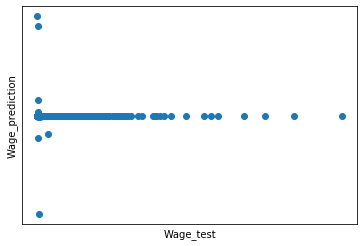

In [108]:
######### Linear Regression #########

# Train & Test
train, test = train_test_split(df, test_size=0.2)

# Training Model
x_train = train.drop('Wage', axis=1)
y_train = train['Wage']

model = LinearRegression()
model.fit(x_train, y_train)

r_sq = model.score(x_train, y_train)
print(r_sq)

# Testing
x_test = test.drop('Wage', axis=1)
y_test = test['Wage']
y_pred = model.predict(x_test)

# Plot outputs
plt.scatter(y_test, y_pred)

plt.xlabel("Wage_test")
plt.ylabel("Wage_prediction")

plt.xticks(())
plt.yticks(())

plt.show()

In [50]:
r_sq = model.score(x_train, y_train)
b0 = model.intercept_
b1 = model.coef_
print("r_sq, coefficient of determination: ")
print(r_sq)
print("b0, intercept: ")
print(b0)
print("b1, slope: ")
print(b1)

print("y_pred = model.intercept_ + model.coef_ * x")

r_sq, coefficient of determination: 
0.9069326053067588
b0, intercept: 
-45327929.49189462
b1, slope: 
[ 2.24631195e-01  2.13399389e-01 -2.45808331e-01 ...  1.17193992e+05
  1.17192444e+05  1.17193042e+05]
y_pred = model.intercept_ + model.coef_ * x


In [113]:
# Metrics
results = pd.DataFrame(list(zip(y_test, y_pred)), 
               columns =['Wage_test', 'Wage_prediction']) 

accuracy = results["Wage_test"] - results["Wage_prediction"]
accuracy = np.square(accuracy)
accuracy = np.sqrt(accuracy)

print("# compare test and prediction")
print(results)

print("# span of data")
span = results["Wage_test"].max() - results["Wage_test"].min()
print(span)

print("# median accuracy")
median = np.median(accuracy) 
print(median)

# percent deviation
percent = median / span * 100
percent_str = "{:.4f}".format(percent)
percent_str = percent_str + " %"
percent_str

# compare test and prediction
      Wage_test  Wage_prediction
0             6              3.0
1            10             11.0
2             3              3.0
3            20             17.0
4            10             14.0
...         ...              ...
2946          4              5.0
2947          2              1.0
2948          2              1.0
2949          1              1.0
2950          1              1.0

[2951 rows x 2 columns]
# span of data
454
# median accuracy
1.0


'0.2203 %'

In [117]:
######### Polynomial Regression #########

train, test = train_test_split(df, test_size=0.2)
    
# Training Model
x_train = train.drop('Wage', axis=1)
y_train = train['Wage']

model = PolynomialFeatures(degree=2)
x_poly = model.fit_transform(x_train)

model.fit(x_poly, y_train)

r_sq = model.score(x_train, y_train)

# Testing
x_test = test.drop('Wage', axis=1)
y_test = test['Wage']
y_pred = model.predict(x_test)
return([name, r_sq, y_test, y_pred])

MemoryError: Unable to allocate array with shape (11800, 521731) and data type float64

In [121]:
train, test = train_test_split(df, test_size=0.2)
    
# Training Model
x_train = train.drop('Wage', axis=1)
y_train = train['Wage']

degree = 2
poly_features = PolynomialFeatures(degree)

x_train_poly = poly_features.fit_transform(x_train)


MemoryError: Unable to allocate array with shape (11800, 521731) and data type float64

0.8080014336921917


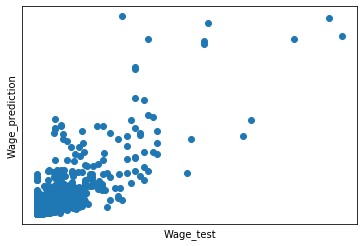

In [81]:
######### knn Regression #########

train, test = train_test_split(df, test_size=0.2)
n_neighbors = 5

# Training Model
x_train = train.drop('Wage', axis=1)
y_train = train['Wage']

model = neighbors.KNeighborsRegressor(n_neighbors)
model.fit(x_train, y_train)

r_sq = model.score(x_train, y_train)
print(r_sq)

# Testing
x_test = test.drop('Wage', axis=1)
y_test = test['Wage']
y_pred = model.predict(x_test)

# Plot outputs
plt.scatter(y_test, y_pred)

plt.xlabel("Wage_test")
plt.ylabel("Wage_prediction")

plt.xticks(())
plt.yticks(())

plt.show()

1.0


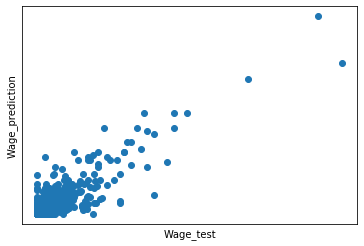

In [110]:
######### Regression Trees #########

train, test = train_test_split(df, test_size=0.2)

# Training Model
x_train = train.drop('Wage', axis=1)
y_train = train['Wage']

model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)

r_sq = model.score(x_train, y_train)
print(r_sq)

# Testing
x_test = test.drop('Wage', axis=1)
y_test = test['Wage']
y_pred = model.predict(x_test)

# Plot outputs
plt.scatter(y_test, y_pred)

plt.xlabel("Wage_test")
plt.ylabel("Wage_prediction")

plt.xticks(())
plt.yticks(())

plt.show()